# Import Libraries

In [39]:
!pip install scikit-fuzzy

In [40]:
import skfuzzy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# **Data1**

# Reading File

In [41]:
df = pd.read_csv("/content/data1.csv")
print(df)

         X      Y  Class
0     5.50   7.00      1
1     9.40  13.00      1
2     6.00   6.80      1
3    12.50  13.00      0
4     5.50   5.60      1
..     ...    ...    ...
207  12.72  12.05      0
208  11.24   9.73      0
209  14.65  10.31      0
210  14.84  10.78      0
211  17.18  13.34      0

[212 rows x 3 columns]


# Normalization

In [42]:
features_to_normalize =  ['X', 'Y'] # because we want these two to be normalized
data = df[features_to_normalize].values # separating the features from dataframe

normalizer = StandardScaler() # normalizer
normalized_data = normalizer.fit_transform(data)
df_normalized = pd.DataFrame(normalized_data, columns=features_to_normalize) # creating new DataFrames with normalized data

print(df_normalized)

            X         Y
0   -0.813747 -0.357511
1   -0.126986  0.998022
2   -0.725701 -0.402696
3    0.418901  0.998022
4   -0.813747 -0.673802
..        ...       ...
207  0.457641  0.783396
208  0.197024  0.259256
209  0.797500  0.390291
210  0.830958  0.496475
211  1.243014  1.074835

[212 rows x 2 columns]


# FCM

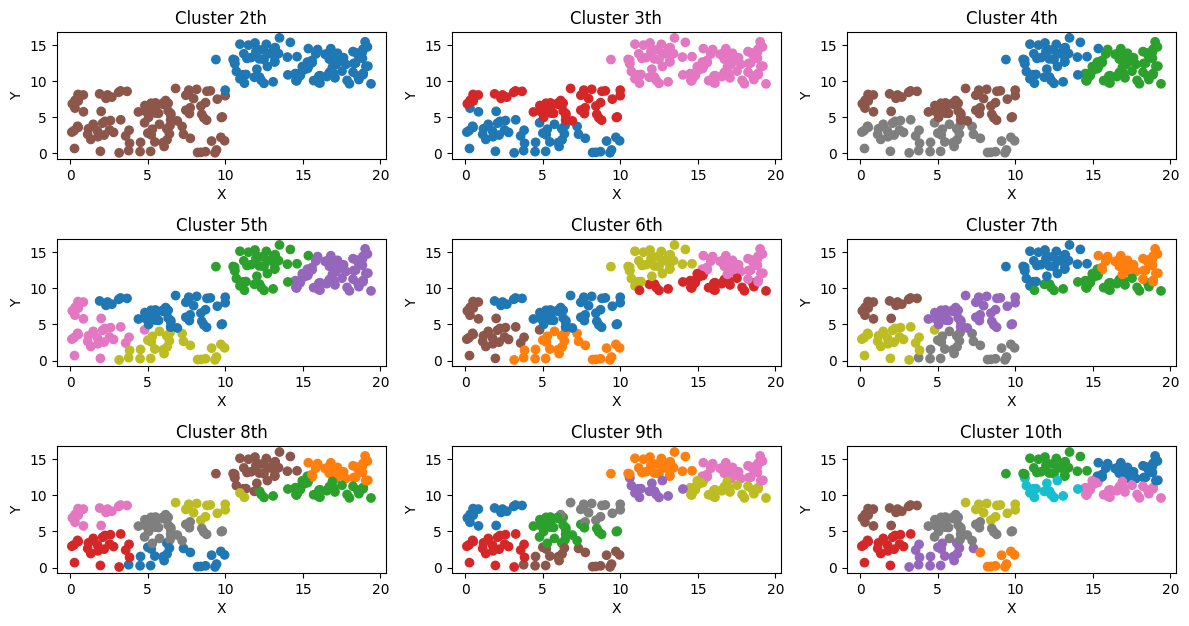

In [43]:
plt.figure(figsize=(12, 8))

AllFPCs = []
iteration = 1
for num_clusters in range(2 , 11):
    cntr, u, u0, d, jm, p, fpc = skfuzzy.cluster.cmeans(df_normalized.T, num_clusters, m=2, error=0.005, maxiter=1000)

    #determine the final class using argmax membership
    cluster_membership = u.argmax(axis=0)
    AllFPCs.append(fpc)

    # plot the result
    plt.subplot(4, 3, iteration)
    colors = plt.cm.tab10(cluster_membership / float(num_clusters))
    plt.scatter(df['X'], df['Y'], c=colors)
    plt.title(f'Cluster {num_clusters}th')
    plt.xlabel('X')
    plt.ylabel('Y')
    iteration+=1

plt.tight_layout()
plt.show()

# FCP

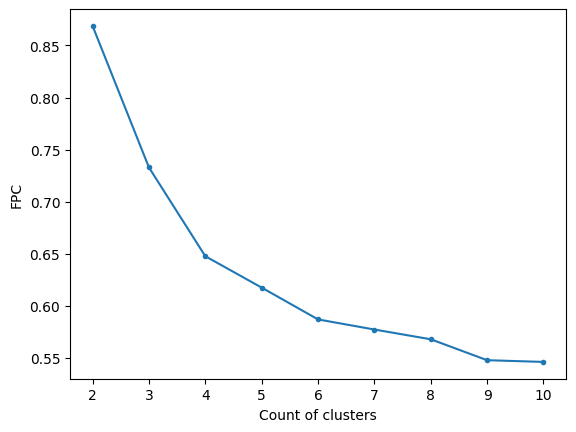

In [44]:
plt.plot(range(2,11), AllFPCs , marker = '.')
plt.xlabel('Count of clusters')
plt.ylabel('FPC')
plt.show()

Text(0, 0.5, 'Y')

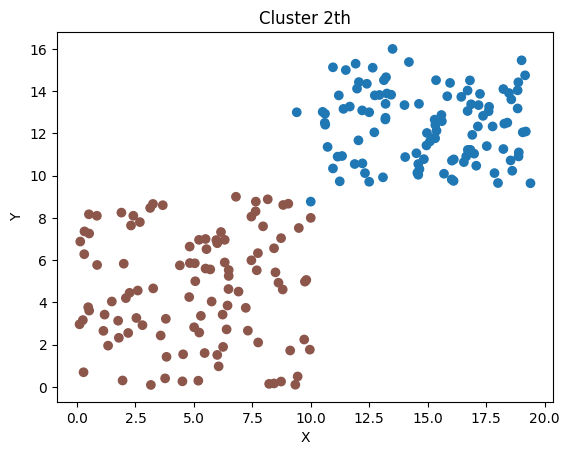

In [45]:
num_cluster = np.argmax(AllFPCs) + 2
cntr, u, u0, d, jm, p, fpc = skfuzzy.cluster.cmeans(df_normalized.T, num_cluster, m=2, error=0.005, maxiter=1000)
cluster_membership = u.argmax(axis=0)
colors = plt.cm.tab10(cluster_membership / float(num_cluster))
plt.scatter(df['X'], df['Y'], c=colors)
plt.title(f'Cluster {num_cluster}th')
plt.xlabel('X')
plt.ylabel('Y')

# **Data2**

# Reading File

In [46]:
df = pd.read_csv("/content/data2.csv")
print(df)

            X         Y  Class
0   -0.842046  0.408155      0
1    0.096394 -0.852114      1
2   -0.964828  0.034454      0
3   -0.164699  0.817332      1
4    0.274231  0.756343      1
..        ...       ...    ...
295 -0.526197  0.815028      0
296  0.832952  0.086819      1
297 -0.900569 -0.555313      0
298 -0.534179 -0.513472      1
299 -0.949867 -0.258711      0

[300 rows x 3 columns]


# Normalization

In [47]:
features_to_normalize =  ['X', 'Y'] # because we want these two to be normalized
data = df[features_to_normalize].values # separating the features from dataframe

normalizer = StandardScaler() # normalizer
normalized_data = normalizer.fit_transform(data)
df_normalized = pd.DataFrame(normalized_data, columns=features_to_normalize) # creating new DataFrames with normalized data

print(df_normalized)

            X         Y
0   -1.315522  0.649213
1    0.141025 -1.323862
2   -1.506091  0.064147
3   -0.264216  1.289819
4    0.417045  1.194334
..        ...       ...
295 -0.825294  1.286212
296  1.284232  0.146129
297 -1.406355 -0.859190
298 -0.837684 -0.793684
299 -1.482871 -0.394832

[300 rows x 2 columns]


# FCM

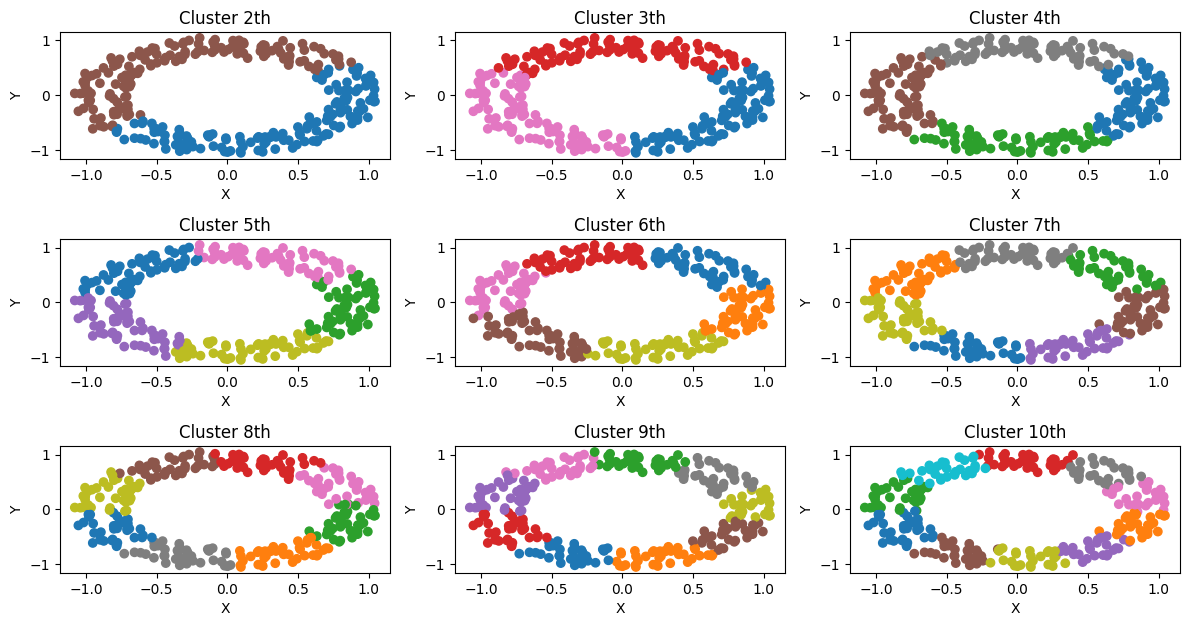

In [48]:
plt.figure(figsize=(12, 8))

AllFPCs = []
iteration = 1
for num_clusters in range(2 , 11):
    cntr, u, u0, d, jm, p, fpc = skfuzzy.cluster.cmeans(df_normalized.T, num_clusters, m=2, error=0.005, maxiter=1000)

    #determine the final class using argmax membership
    cluster_membership = u.argmax(axis=0)
    AllFPCs.append(fpc)

    # plot the result
    plt.subplot(4, 3, iteration)
    colors = plt.cm.tab10(cluster_membership / float(num_clusters))
    plt.scatter(df['X'], df['Y'], c=colors)
    plt.title(f'Cluster {num_clusters}th')
    plt.xlabel('X')
    plt.ylabel('Y')
    iteration+=1

plt.tight_layout()
plt.show()

# FCP

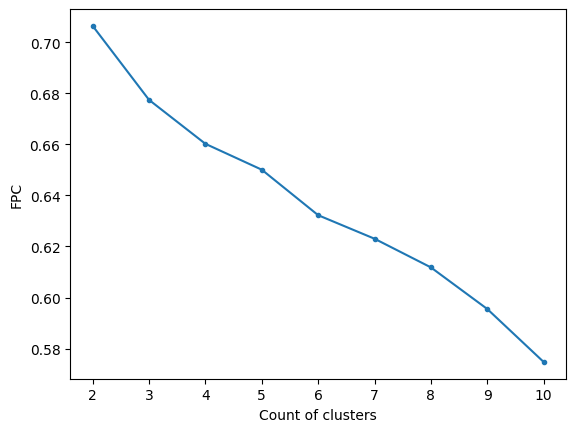

In [49]:
plt.plot(range(2,11), AllFPCs , marker = '.')
plt.xlabel('Count of clusters')
plt.ylabel('FPC')
plt.show()

Text(0, 0.5, 'Y')

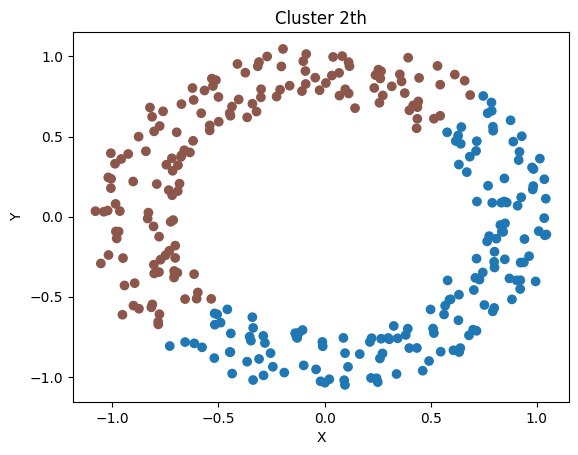

In [50]:
num_cluster = np.argmax(AllFPCs) + 2
cntr, u, u0, d, jm, p, fpc = skfuzzy.cluster.cmeans(df_normalized.T, num_cluster, m=2, error=0.005, maxiter=1000)
cluster_membership = u.argmax(axis=0)
colors = plt.cm.tab10(cluster_membership / float(num_cluster))
plt.scatter(df['X'], df['Y'], c=colors)
plt.title(f'Cluster {num_cluster}th')
plt.xlabel('X')
plt.ylabel('Y')